In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [9]:
K = 10 # arms
N = 20 # explore (iterations per arm) -> optimal should be T^(2/3)
T = 1000 # horizon (explore+exploit=total tries)
bandit = np.random.random((K,)) # vector of random k entries
print("rewards: ", bandit)
best_reward = np.amax(bandit)
print("Reward of best arm:", best_reward)

rewards:  [0.01675183 0.60836775 0.86018343 0.59366576 0.26744469 0.33267822
 0.11042677 0.90349736 0.21223628 0.12584819]
Reward of best arm: 0.9034973623299146


In [10]:
bandit_score = np.zeros((K,)) # total score of each arm for first N rounds (exploration score)
pulls = np.zeros((K,)) # total number of arm pulls
inst_score = np.zeros((T,)) # score at time t
best_score = np.zeros((T,)) # cumulative score of best arm at time t
alg_score = np.zeros((T,)) # cumulative score of algorithm at time t
regret = np.zeros((T,)) # regret for time t

In [11]:
# exploration phase
for n in range(N):
  for k in range(K):
    score = np.random.binomial(1, p=bandit[k])
    inst_score[n*K+k] = score
    bandit_score[k] += score

selected_arm = np.argmax(bandit_score/N)

# print("success or failure: ", inst_score)
print("score per arm: ", bandit_score)
print("normalized score per arm: ", bandit_score/N)
print("selected arm: ", selected_arm)

score per arm:  [ 0. 10. 16. 15.  6.  9.  2. 18.  3.  1.]
normalized score per arm:  [0.   0.5  0.8  0.75 0.3  0.45 0.1  0.9  0.15 0.05]
selected arm:  7


In [12]:
# exploitation phase
for t in range(N*K,T):
  inst_score[t] = np.random.binomial(1, p=bandit[selected_arm])

for t in range(T):
  if (t>0):
    best_score[t] = best_score[t-1] + best_reward
  else:
    best_score[t] = best_reward

  if (t>0):
    alg_score[t] = alg_score[t-1] + inst_score[t]
  else:
    alg_score[t] = inst_score[t]

  regret[t] = (best_score[t] - alg_score[t])/(t+1)


<function matplotlib.pyplot.show(close=None, block=None)>

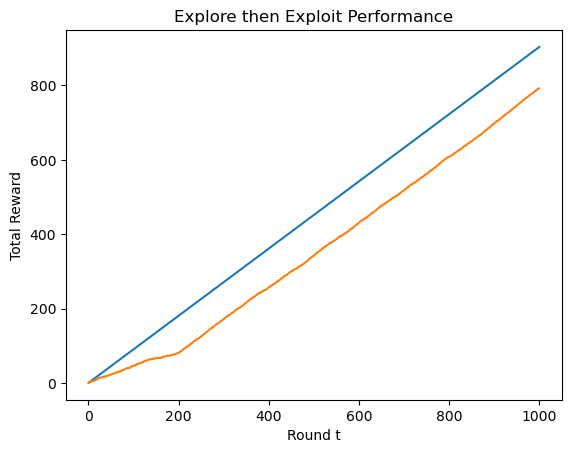

In [13]:
plt.title("Explore then Exploit Performance")
plt.xlabel("Round t")
plt.ylabel("Total Reward")
plt.plot(np.arange(1,T+1),best_score,alg_score)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

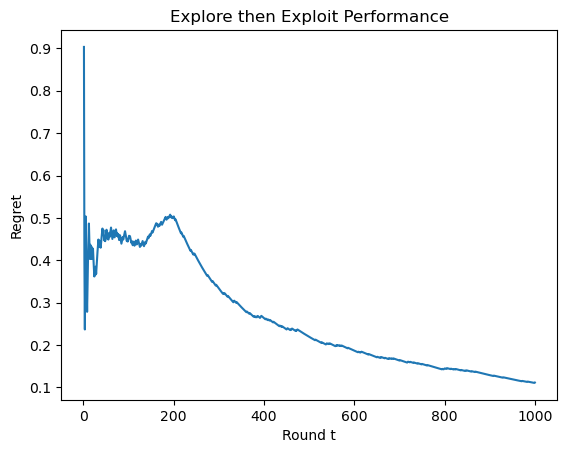

In [14]:
plt.title("Explore then Exploit Performance")
plt.xlabel("Round t")
plt.ylabel("Regret")
plt.plot(np.arange(1,T+1),regret)
plt.show